# Séance 2

## Objectifs de la séance

- Etude de système d’ordre 2
- Analyse de la réponse indicielle
- Influence de zeta sur les caractéristiques temporelles : dépassement, temps de réponse, …
- Lien entre ces caractéristiques et la position des pôles

In [1]:
from IPython.display import Image, display, Markdown

from control.matlab import *  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Library to manipulate array and matrix
import matplotlib.pyplot as plt # Library to create figures and plots
import math # Library to be able to do some mathematical operations
import ReguLabFct as rlf # Library useful for the laboratory of regulation of HELMo Gramme

## Réponse indicielle du 2 nd ordre générale paramétrée

Soit un système du second degré : 
$
 G(p)=\frac{K}{(\frac{p}{\omega_n})^2+\frac{2\zeta}{\omega_n}p+1}
$
(cfr page 3-6)

Analysez pour les valeurs caractéristiques de zeta : 0.1 0.2 0.3 0.42 0.5 0.6 0.7 0.8 1 1.41 2 6 10 les réponses typiques cfr la page 3-9.
Créez un script qui permette de tracer de manière itérative les différentes fonctions dont les différents zeta seront encodés dans un vecteur.

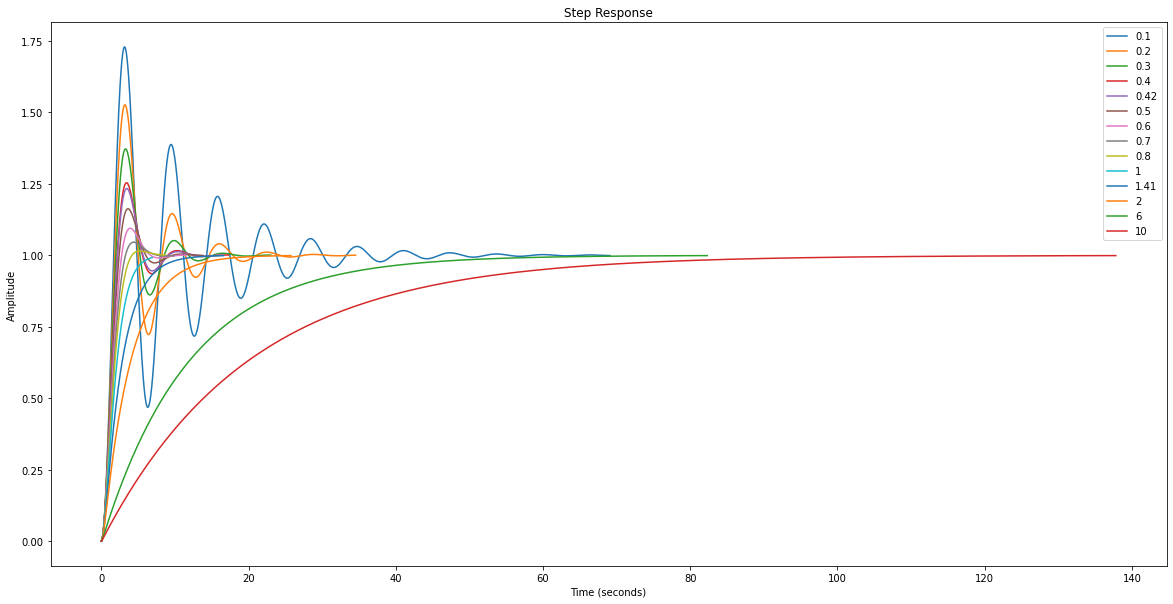

In [18]:
K=1
wn=1

# Définition des coefficients d'amortissement
zetas =[0.1, 0.2, 0.3, 0.4, 0.42, 0.5, 0.6, 0.7, 0.8, 1, 1.41, 2, 6, 10]
g=[]

# Création de la fenêtre à une taille donnée
fig = plt.figure("Steps",figsize=(20,10))
ax = fig.subplots()

# Réponse indicielle
# Calcule les différentes fonctions de transfert ainsi que la réponse indicielle
for i, zeta in enumerate(zetas): 
    n=K;
    d=[(1/wn)**2, 2*zeta/wn, 1];
    g.append(tf(n, d));
    h=g[i];
    rlf.step_(h,NameOfFigure='Steps', sysName=zeta);

### Commentaires sur les courbes

.....................................................

.....................................................


### Dépassement

Visualisez la valeur du dépassement pour les différentes valeurs de zeta et regardez l’influence de zeta sur la valeur du dépassement sur l’abaque de la page 3-11 : D ....... si zeta ......

Observez que les échelles de cet abaque sont logarithmiques. Par exemple, observez la valeur du dépassement lorsque zeta=0.5, sur la figure et indiquez clairement la position de ce point sur l’abaque.

![Abaque_Depassement](../images/Abaque_Depassement.png)

Vérifiez par calcul :

$
 D_p=100*e^{-\frac{k\pi\zeta}{\sqrt{1-\zeta^2}}}
$

#### Pseudo pulsation

Observez l’influence de zeta sur la pulsation d’oscillation $\omega_d$ : $\omega_d$ ... si $\zeta$ ...

### Temps de réponse à 5%

Visualisez la valeur du temps de réponse à 5 % pour les différentes valeurs de $\zeta$ et regardez l’influence de $\zeta$ sur l’abaque de la page 3-12.

![Abaque_tr5](../images/Abaque_tr5.png)

Expliquez l’allure particulière de cette courbe :
- si $\zeta$>1 : ...
- en $\zeta$ = 0.7 : ...
- si $\zeta$<1 : « escaliers » dans la partie gauche car ...

Pourquoi le $t_{r_{5\%}}$ est-il identique pour un $\zeta$ de 0,6 ou 0,5 ?